<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FM5222

# Week 10


## Agenda

* ARIMA model
* Tests for stationarity and unit roots
* (p,d,q) selection
* Forecasting
* Examples







## ARIMA model

We previously discussed the ARMA(p,q) model which had the form:


$$X_t = \phi_0 + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots \phi_p X_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} +\theta_2 \epsilon_{t-2}+ \cdots + \theta_p \epsilon_{t-q}  $$

But fitting such a model usually requires in the first place that the the process is stationary.

Recall that if a series is not stationary, one way to address that is to difference the series.

That is, we might have a data series $x_t$ that does not appear to be stationary.  But we then create the differences series $y_t = \Delta x_t = x_t - x_{t-1}$

Suppose that we difference $x_t$ once and it appears to be stationary and we then successfully model $\Delta x_t$  as ARMA(p,q).  We would then say that $x_t$ is ARIMA(p,1,q).

That that means is that we have an ARMA(p,q) proces that, once we integrate it, represents $x_t$. 


What do we mean by "integrate"?  If we have $y_t$, we can produce $x_t$ (assuming we know $x_0$) via

$$x_1 = x_0 + y_1\\
x_2 = x_1 + y_2 = x_0 + y_1 + y_2\\
x_n = x_0 + \sum_{k=1}^ny_k$$


The summing of $y$ values is analogus to integration if we think of integration as summing areas.


If we difference a series once and it still doesn't look stationary, maybe we need to difference it again.  If we need to difference $d$ times before we can suitably model ARMA(p,q), we say the process is ARIMA(p,d,q).









#### Example

We will build a process that is AR(1) and then integrate twice to illustrate.

We start with $z(t) = 0.7 z(t-1) + \epsilon_t$

where $\epsilon_t = \mathcal{N}(0,\sigma^2)$ 

Then define $y(t) = \sum_{k=1}^t z_t$ and in turn $x_t = \sum_{k=1}^t y(t)$

Note that here we are just taking $y_0 = x_0 = 0$ for simplicity.  They can be anything.

We will also take $\sigma = 1$ for simplicity.

In [ ]:
!pip install statsmodels==0.13.2

!pip install pmdarima




     |████████████████████████████████| 9.8 MB 5.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 1.4 MB 5.1 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
T = 200
phi = .7

z = np.zeros(T+1)

np.random.seed(339)

eps = np.random.normal(size = T)


for k in range(T):
    z[k+1] = phi*z[k] + eps[k] 

z = z[1:]  #drop leading zero


y = z.cumsum()

x = y.cumsum()

Now let's plot $x$

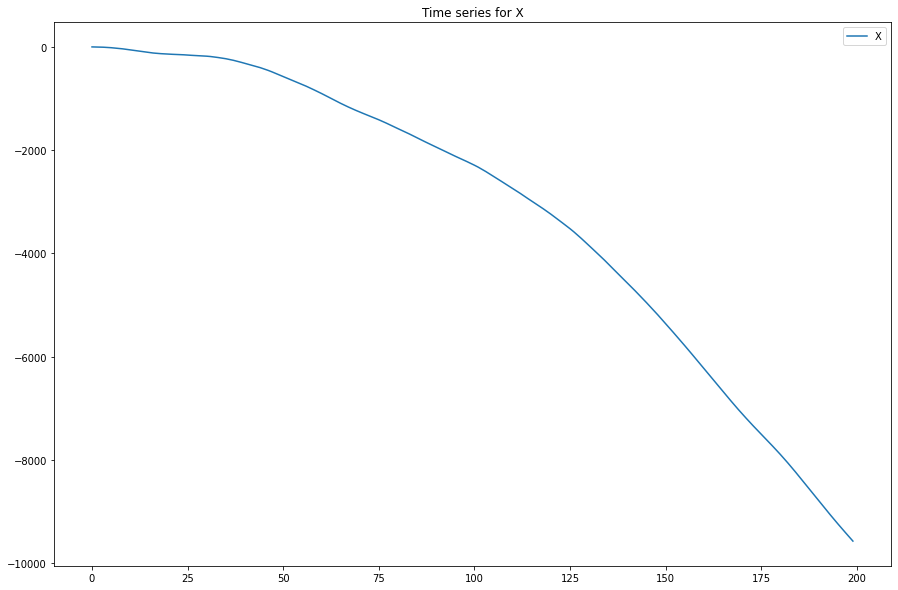

In [ ]:
plt.figure(figsize = (15,10))

plt.plot(x, label = "X")

plt.legend()

plt.title("Time series for X")

plt.show()

We would hardly look at this and think, "stationary".   So we might difference it:

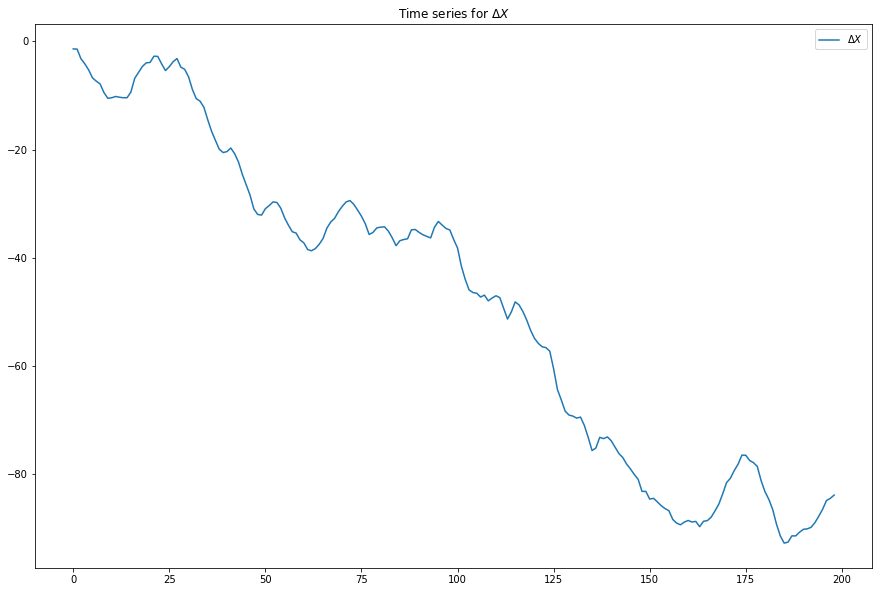

In [ ]:
xd1 = np.diff(x)

plt.figure(figsize = (15,10))

plt.plot(xd1, label = "$\\Delta X$")

plt.legend()

plt.title("Time series for $\\Delta X$")

plt.show()


Nope, still not stationary

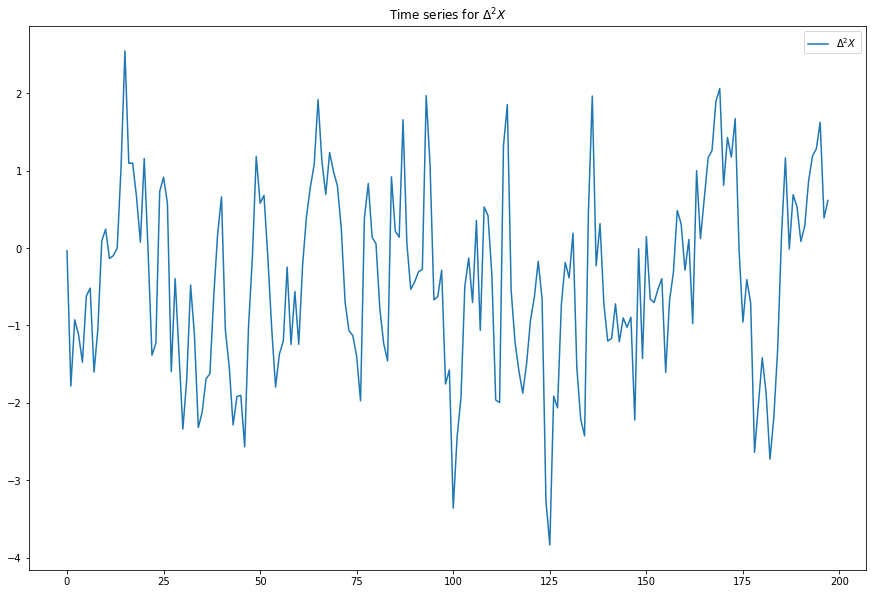

In [ ]:
xd2 = np.diff(xd1)

plt.figure(figsize = (15,10))

plt.plot(xd2, label = "$\\Delta^2 X$")

plt.legend()

plt.title("Time series for $\\Delta^2 X$")

plt.show()

That looks like what we want.  **This** we can model.

## Tests for stationarity and unit roots


### Unit Roots

Consider an AR(1) process $x_t = \phi x_{t-1} + \epsilon_t$.  We know that if $|phi| <1$, the process is stationary.  
But consider what happens if

1) $|\phi| > 1$

2) $|\phi| =1$


In the first case, we say that the process is *explosive*.  This is becaue the absolute value of $x_t$ will grow exponentially. 

In the second, the process is not stationary becaue the absolute value of $x_t$ grows without bound; but the growth is *linear*.    We illustrate with an example. Set

$$x_t = x_{t-1} + \epsilon_t$$ 

and


$$y_t = 1.01 x_{t-1} + \epsilon_t$$


We then plot


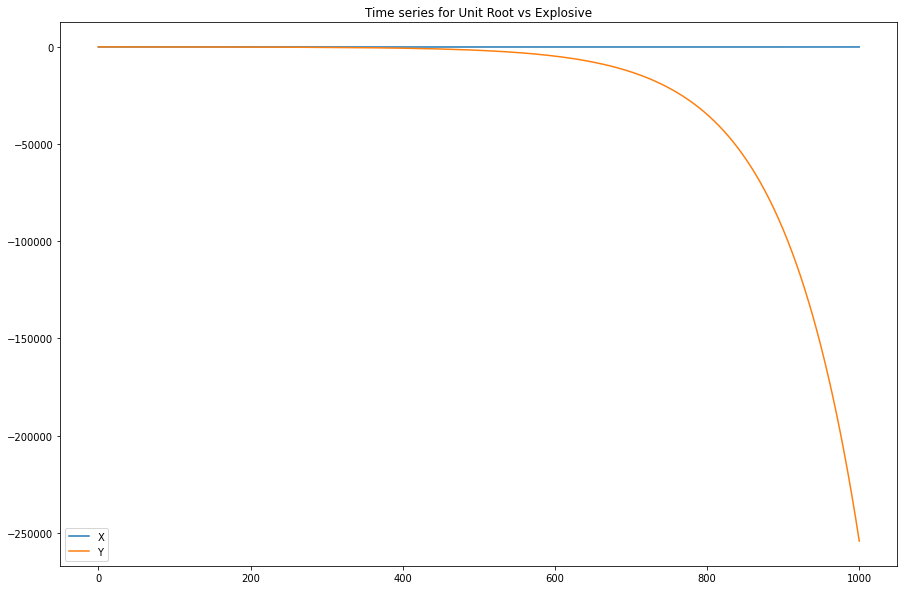

In [ ]:
T = 1000
phi = 1.01

x = np.zeros(T+1)
y = np.zeros(T+1)

#np.random.seed(331)

eps = np.random.normal(size = T)


for k in range(T):
    x[k+1] = x[k] + eps[k] 
    y[k+1] = phi*y[k] + eps[k] 
    

    
plt.figure(figsize = (15,10))

plt.plot(x, label = "X")

plt.plot(y, label = "Y")

plt.legend()

plt.title("Time series for Unit Root vs Explosive")

plt.show()
    
    

Of course, it may not happen super fast ($\phi = 1.01$ after all)

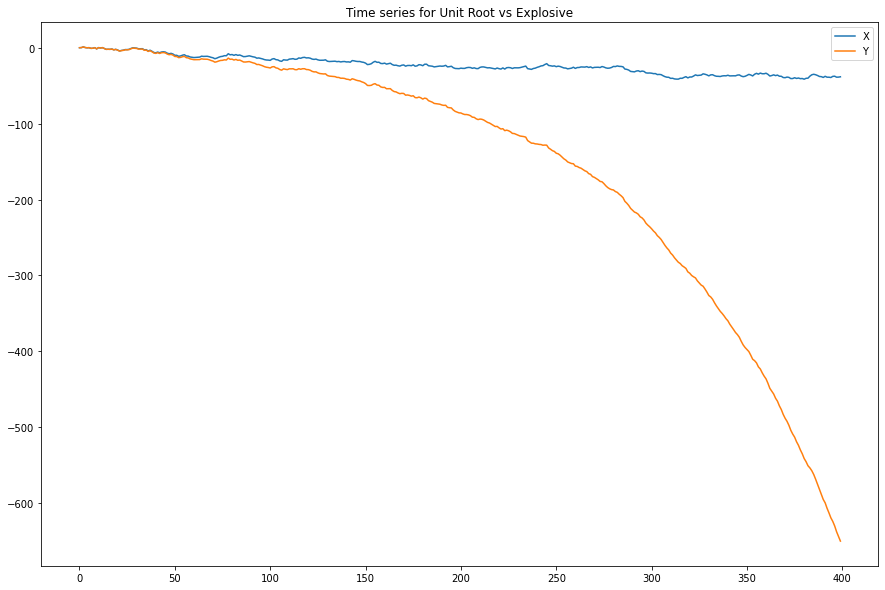

In [ ]:
    
plt.figure(figsize = (15,10))

plt.plot(x[0:400], label = "X")

plt.plot(y[0:400], label = "Y")

plt.legend()

plt.title("Time series for Unit Root vs Explosive")

plt.show()

Generally speaking, detecting "explosive" is not hard as long we can observe enough points.  On the other hand, it can be much trickier to tell the difference between 

1) $|\phi| = 1$

and

2) $|\phi| <1$

The second is stationary while the first is not.    Consider our previous example, but now we compare $x_t$ with

$z_t = .99z_{t-1} + \epsilon_t$

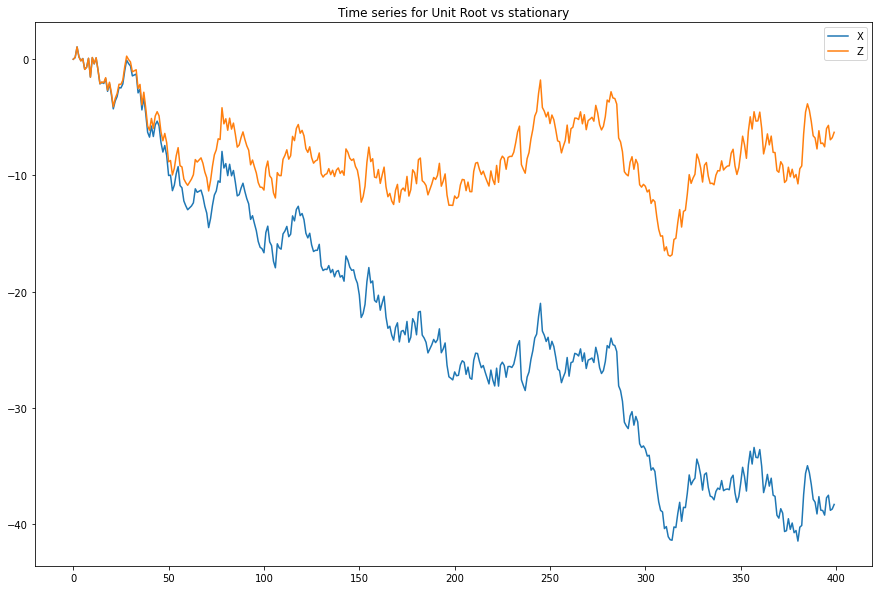

In [ ]:
phi = .99
z = np.zeros(T+1)

for k in range(T):
    z[k+1] = phi*z[k] + eps[k] 
    
 

    
plt.figure(figsize = (15,10))

plt.plot(x[0:400], label = "X")

plt.plot(z[0:400], label = "Z")

plt.legend()

plt.title("Time series for Unit Root vs stationary")

plt.show()
    
    

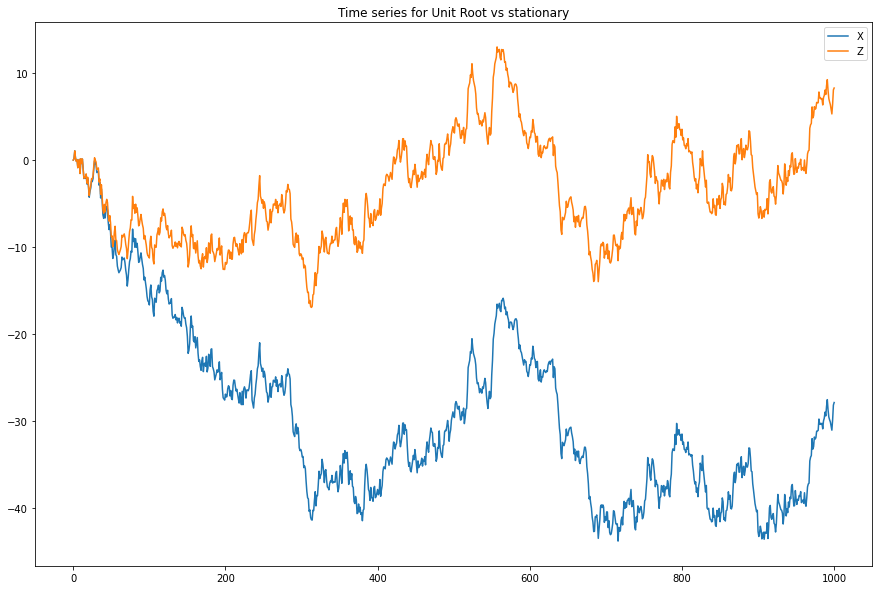

In [ ]:
plt.figure(figsize = (15,10))

plt.plot(x, label = "X")

plt.plot(z, label = "Z")

plt.legend()

plt.title("Time series for Unit Root vs stationary")

plt.show()

Because it can be hard to tell by inspection, there are several statistical tests that are commonly employed.  We will mention 2.


**Comment**   We haven't formally defined Unit Root.  But take it to mean that the process is one (or more) differencing away from being stationary.  That is to say, the process is an integrated stationary process.  The most simple example of whish is a random walk.   


### Dickey-Fuller

The Dickey-Fuller test tests 

$H_0:$ The process has a unit root

vs 

$H_a:$ The process is stationary.

Note that the DF test assumes that the process is not explosive. 

#### Example

We will take our random walk $X$ and the AR(1) process $y$ with $\phi = .5$ and apply the DF test.




In [ ]:
T = 1000
phi = 0.5

x = np.zeros(T+1)
y = np.zeros(T+1)

np.random.seed(331)

eps = np.random.normal(size = T)


for k in range(T):
    x[k+1] = x[k] + eps[k] 
    y[k+1] = phi*y[k] + eps[k]
    
    

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(x)[1]

0.5118983641542197

In [ ]:
adfuller(y)[1]

2.1499301613193503e-29

Of course, if $\phi$ is closer to one, the test can be weaker.

In [ ]:
T = 10000
phi = .5

x = np.zeros(T+1)
y = np.zeros(T+1)

np.random.seed(331)

eps = np.random.normal(size = T)

for phi in np.array([.8, .9,.95, .99,1]):
    for k in range(T):
     
        y[k+1] = phi*y[k] + eps[k]
    print("P value for phi = ", phi, "is ", adfuller(y)[1])    
    
    
 

P value for phi =  0.8 is  0.0
P value for phi =  0.9 is  0.0
P value for phi =  0.95 is  4.24236273525802e-29
P value for phi =  0.99 is  1.4579296080426626e-09
P value for phi =  1.0 is  0.6725457757642277


Or fewer data points

In [ ]:
T = 100
phi = .5

x = np.zeros(T+1)
y = np.zeros(T+1)

np.random.seed(331)

eps = np.random.normal(size = T)

for phi in np.array([.8, .9,.95, .99,1 ]):
    for k in range(T):
     
        y[k+1] = phi*y[k] + eps[k]
    print("P value for phi = ",phi, "is ", adfuller(y)[1])    
    

P value for phi =  0.8 is  0.0006304845772697572
P value for phi =  0.9 is  0.011258940543793953
P value for phi =  0.95 is  0.04514799332069119
P value for phi =  0.99 is  0.22581380138161028
P value for phi =  1.0 is  0.37559892285101765


### KPSS test

The Kwiatkowski-Phillips-Schmidt-Shin test is diffent for it:


$H_0:$ he process is stationary.

vs 

$H_a:$ The process has a unit root


Let's try it out.



In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
T = 1000


x = np.zeros(T+1)
y = np.zeros(T+1)

np.random.seed(331)

eps = np.random.normal(size = T)

for phi in np.array([.8, .9,.95, .99,1 ]):
    for k in range(T):
     
        y[k+1] = phi*y[k] + eps[k]
    print("P value for phi = ",phi, "is ", kpss(y)[1]) 

P value for phi =  0.8 is  0.1
P value for phi =  0.9 is  0.07438301228268113
P value for phi =  0.95 is  0.018160910141717734
P value for phi =  0.99 is  0.01
P value for phi =  1.0 is  0.01


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


## (p,d,q) selection


The process for selecting (p,d,q) can be sometimess ad hoc.  Particularly when it's not clear whether (for example) to use $d = 0$ or $d =1$.  Here are a couple of approaches.

1. Select $d$ by starting with $d=0$ and applying the KPSS test until the p-value sufficiently large that we do not reject stationarity.  Then select (p,q) for the ARMA model using AIC or BIC.  

In python, there is a package pmdarima that has a function auto_arima that does this.



2. Perform a grid-search on various choices of (p,d,q) and assess by how well they perform out of sample.  That is to say, hold out a subset of the time series (typicall the last $20\%$ or $30\%$ of the data) and train the models on the rest.  Apply a success measure like RMSE to the forcast.



### ARIMA generation

In order to test more easily generate example, we can use python to make data sets generated from ARIMA models.


Here we will create an $ARMA(1,1)$ process with

$\phi = .5$
and
$\theta = .25$



In [ ]:
import statsmodels.api as sm


from statsmodels.tsa.arima_process import arma_generate_sample

In [ ]:
arparms = [1, -.5]  # in this function, the AR parameters are given minus signs
maparms = [1, .25]  # Both parmater array need leading ones.
x = arma_generate_sample(arparms, maparms, nsample =  1000, scale = .1)

In [ ]:
help(arma_generate_sample)

Help on function arma_generate_sample in module statsmodels.tsa.arima_process:

arma_generate_sample(ar, ma, nsample, scale=1, distrvs=None, axis=0, burnin=0)
    Simulate data from an ARMA.
    
    Parameters
    ----------
    ar : array_like
        The coefficient for autoregressive lag polynomial, including zero lag.
    ma : array_like
        The coefficient for moving-average lag polynomial, including zero lag.
    nsample : int or tuple of ints
        If nsample is an integer, then this creates a 1d timeseries of
        length size. If nsample is a tuple, creates a len(nsample)
        dimensional time series where time is indexed along the input
        variable ``axis``. All series are unless ``distrvs`` generates
        dependent data.
    scale : float
        The standard deviation of noise.
    distrvs : function, random number generator
        A function that generates the random numbers, and takes ``size``
        as argument. The default is np.random.standard_nor

We then generate a ARIMA(1,1,1) process by integrating.

In [ ]:
y = x.cumsum()


### Using auto_arima

In [ ]:
from pmdarima import auto_arima

In [ ]:

auto_arima(y, trace = True)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1760.020, Time=1.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1180.921, Time=0.52 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1721.930, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1643.425, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1182.848, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1760.291, Time=1.70 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1742.954, Time=1.43 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1758.504, Time=1.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1759.843, Time=2.81 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1760.586, Time=1.63 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1760.545, Time=1.38 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1756.586, Time=2.32 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-1762.556, Time=0.88 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1744.918, Time=0.53 sec
 ARIMA(1,1,3)(0,0,0

ARIMA(order=(0, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

And while we see that it seems to work well for $d$, it ofen picks the wrong orders (p,q). 

For fun, let's see if the coefficients are decently recovered.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA


ma_mod = ARIMA(y, order=(1, 1, 1))
ma_res = ma_mod.fit()

print(ma_res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 883.240
Date:                Tue, 05 Apr 2022   AIC                          -1760.479
Time:                        00:55:09   BIC                          -1745.759
Sample:                             0   HQIC                         -1754.884
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4987      0.042     11.969      0.000       0.417       0.580
ma.L1          0.2726      0.046      5.895      0.000       0.182       0.363
sigma2         0.0100      0.000     21.748      0.0

### Caveat

As the model becomes more complex, the data size become smaller, or the noise becomes larger, the fits can suffer accodingly.

For example, let's make an ARIMA(2,2,2) process.

In [ ]:
arparms = [1, -.5, -.1]  
maparms = [1, .25, .25]  
x = arma_generate_sample(arparms, maparms, nsample =  1000, scale = .5)
y = x.cumsum().cumsum()

In [ ]:
auto_arima(y, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1411.141, Time=0.48 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2188.596, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1454.659, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1770.463, Time=0.10 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1409.442, Time=0.20 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1499.695, Time=0.14 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1454.584, Time=0.16 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=1411.241, Time=0.33 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=1445.607, Time=0.32 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1434.932, Time=0.35 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=1412.362, Time=1.00 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=1411.300, Time=0.52 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0]          
Total fit time: 3.794 seconds


ARIMA(order=(1, 2, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
mod = ARIMA(y, order=(2, 2, 2))
res = mod.fit()


print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -700.571
Date:                Tue, 05 Apr 2022   AIC                           1411.141
Time:                        00:55:14   BIC                           1435.670
Sample:                             0   HQIC                          1420.465
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4789      0.144      3.333      0.001       0.197       0.760
ar.L2          0.0804      0.119      0.676      0.499      -0.153       0.314
ma.L1          0.2195      0.141      1.559      0.1

### Prediction and Forcasting

Suppose we have fit our model and now seek to forcast.  Assume we know the values of $x_t$ for all $t\leq T$ and we have fit our model.   What can we say about $\mathrm{E}[x_{T+\tau}]$?  This value is our forcast.


Let's build up how this works for various simple models.


#### AR(1)


The model is $x_{t+1} = \phi_0+  \phi_1 x_t + \epsilon_{t+1}$ and therefore

 $$\mathrm{E}[x_{T+1}]= \phi_0+ \phi_1 x_T + \mathrm{E}[\epsilon_T] \\
 = \phi_0 + \phi_1 x_T$$
 
And therefore,
 

$$\mathrm{E}[x_{T+2}]= \mathrm{E}[\phi_0+ \phi_1 x_{T+1} + \epsilon_{T+1}] \\
 = \phi_0 + \phi_1(\phi_0 + \phi_1 x_T)\\
 = \phi_0(1 + \phi_1) + \phi_1^2 x_T$$
 
 


 
 
 Continuing on,
 
 $$\mathrm{E}[x_{T+\tau}] = \phi_0(1 + \phi_1 + \cdots + \phi_1^{\tau-1}) + \phi_1^{\tau}x_T\\
 =\phi_0\frac{1-\phi_1^{\tau}}{1-\phi_1} + \phi_1^{\tau}x_T$$




 Recalling that $\mu = \frac{\phi_0}{1-\phi_1}$, this is
 
$$\mathrm{E}[x_{T+\tau}] = \mu(1-\phi_1^{\tau}) + \phi_1^{\tau}x_T$$
 
 
 

 
 

But since we don't know $\phi$, use $\hat{\phi}$:

$$\mathrm{E}[x_{T+\tau}] = \hat{\mu}(1-\hat{\phi}_1^{\tau}) + \hat{\phi}_1^{\tau}x_T$$





#### AR(p)

Here, we can follow a similar process, but the formulas do get a bit messier (though, it's just polynomials in the $\phi$'s).   But it is easy for software to produce the forcasted values.


#### MA(1)

Here the model is 

$$X_{t+1} = \mu + \epsilon_{t+1} + \theta \epsilon_{t}$$


How can we estimate $\epsilon_{t}$?    




In particular, if we can estimate $\hat{X}_{t-1}$ then we can estimate 

$$\hat{\epsilon}_{t-1} = X_{t-1} - \hat{X}_{t-1} $$ 




and our one-step ahead forcast would be

$$\mathrm{E}(X_t) = \mu + \hat{\theta} \hat{\epsilon}_{t-1}$$




Of course, in order to make this work, we would go back to the start of the time-series and work up.  We might start by just taking $\hat{\epsilon}_{-1} = 0$ since we would have no data for $s<0$


For $\tau >1$, we can easily see that 

$$\mathrm{E}(X_{t+\tau}) = \mu$$



#### MA(q)

A similar story here, the key thing is that the forcast for $\tau >q$ steps ahead no longer depend on any estimates $\hat{epsilon}_s$



#### ARMA(p,q)

We can write expressions for the forcasts for ARMA(p,q), it just takes a little patience anc carefulness.  However, computer packages can provide the forcasts for us. 


#### Example

We will generate an ARMA(1,1) process, fit it, look at the predictions and then the forcast.

By "prediction", I simply mean the computed values of the times series under the estimated parameters.



Let's take $\phi = .3, \theta = .7$ and $\sigma = .2$



In [ ]:
arparms = [1, -.3]  
maparms = [1, .7]
sigma = .2
x = arma_generate_sample(arparms, maparms, nsample =  1000, scale = sigma)

We will fit it asssuming we have the correct order $d=0$.

In [ ]:
model = ARIMA(x, order=(1 ,0, 1)).fit()

print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 158.463
Date:                Tue, 05 Apr 2022   AIC                           -308.926
Time:                        00:55:15   BIC                           -289.295
Sample:                             0   HQIC                          -301.465
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0273      0.016     -1.736      0.083      -0.058       0.004
ar.L1          0.2957      0.038      7.722      0.000       0.221       0.371
ma.L1          0.6797      0.027     24.842      0.0

Our diagnostic plots should look excellent.

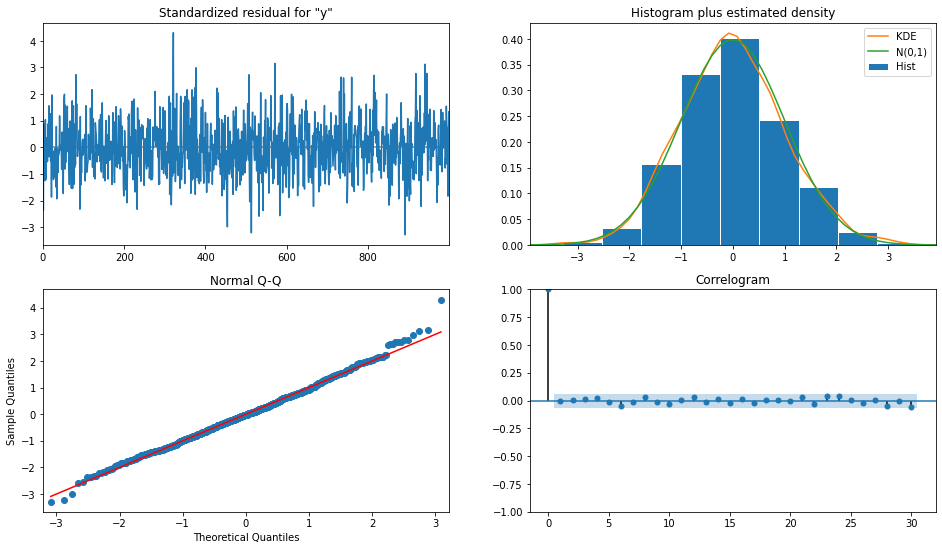

In [ ]:
fig = plt.figure(figsize=(16, 9))
fig = model.plot_diagnostics(fig=fig, lags=30)

#### Predict (in sample)

Plot the predictions along with the actual values

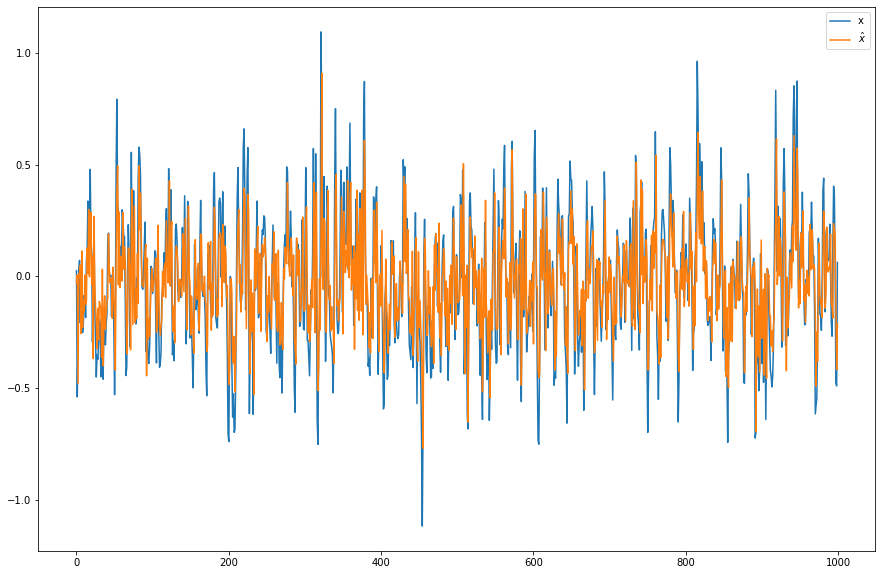

In [ ]:
plt.figure(figsize = (15,10))

plt.plot(x, label = "x")
plt.plot(model.predict(), label ="$\\hat{x}$")


plt.legend()

plt.show()

Since this is hard to see, we zoom in a bit.

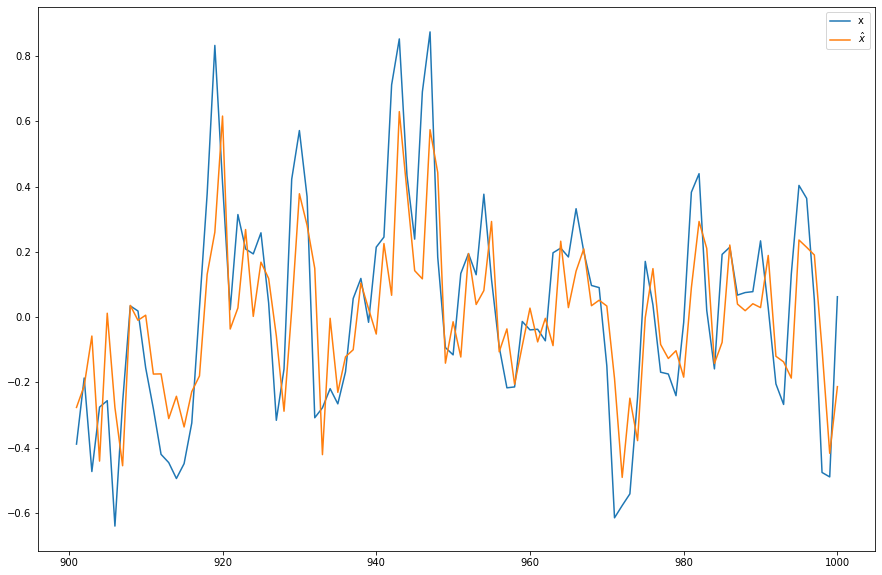

In [ ]:
plt.figure(figsize = (15,10))

t = np.arange(901,1001)
plt.plot(t,x[-100:], label = "x")
plt.plot(t,model.predict()[-100:], label ="$\\hat{x}$")


plt.legend()

plt.show()

#### Forecast  


We want however to predict going forward, so we can use the forecast method to do so for a specified number of steps. 

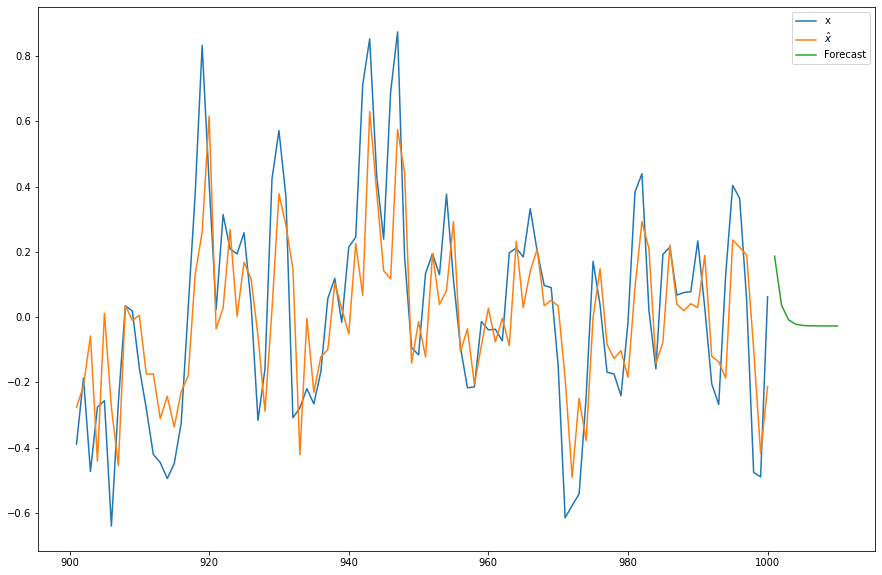

In [ ]:
plt.figure(figsize = (15,10))

t = np.arange(901,1001)
plt.plot(t,x[-100:], label = "x")
plt.plot(t,model.predict()[-100:], label ="$\\hat{x}$")

ta = np.arange(1001,1011)
plt.plot(ta, model.forecast(10), label = "Forecast")


plt.legend()

plt.show()


### Out of sample

The plot above is perhaps uninteresting since in sample, we expect a good prediction. But out of sample, we are just show the "expected value" which quickly moves to the mean.  What we are interested to know is if our model appears to work beyond our training data.

The way we can do this is by using "filter" on our model. This allows us to set the parameters to something else.  For example, what they were for a training portion of the data.


Here will do the following:

1) Use the first $700$ data points to train the model.  
2) Then predict using the estimated parameters, but using the known values of $X_t$.  
3) Plot this

In [ ]:
x_train = x[0:700]
x_test = x[700:]

model_train = ARIMA(x_train, order=(1 ,0, 1)).fit()

mtest=  ARIMA(x_test ,order=(1 ,0, 1))

model_test = mtest.filter(model_train.params) #this allow the model to predict using the recent observations but fixed parameters




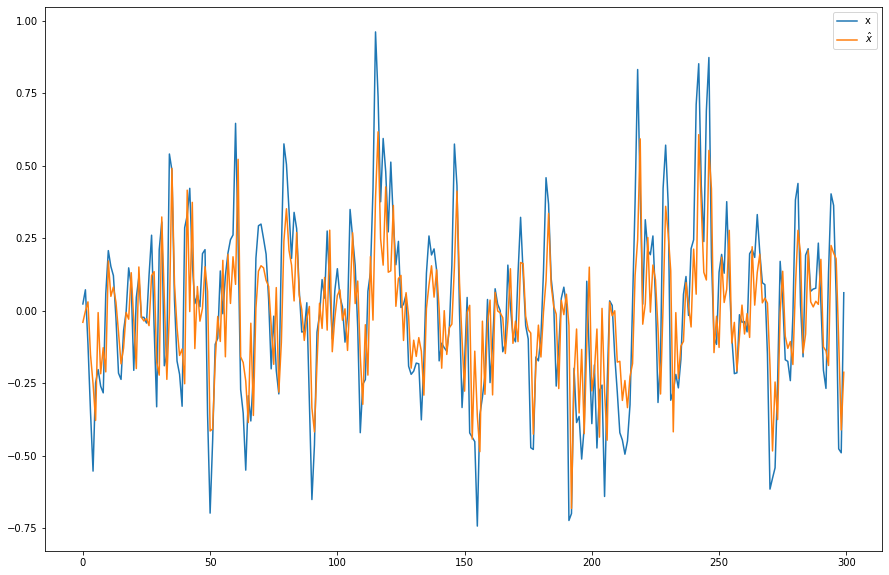

In [ ]:
plt.figure(figsize = (15,10))


plt.plot(x_test, label = "x")
plt.plot(model_test.predict(), label ="$\\hat{x}$")

#


plt.legend()

plt.show()





Or comparing to the model trained on the full set.

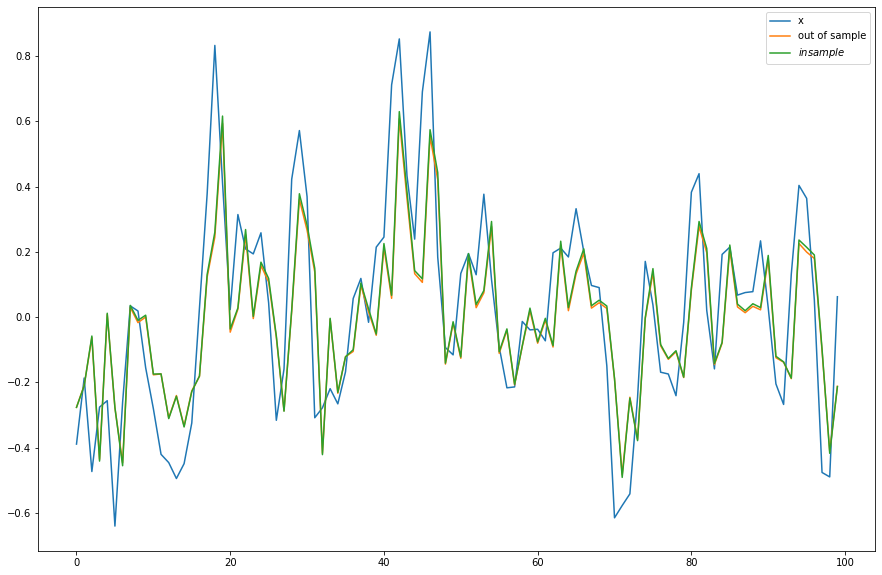

In [ ]:
plt.figure(figsize = (15,10))


plt.plot(x_test[-100:], label = "x")
plt.plot(model_test.predict()[-100:], label ="out of sample")

plt.plot(model.predict()[-100:], label ="$in sample$")




plt.legend()

plt.show()

Usurprisingly, the model predictions out of sample are nearly the same as in sample. This is because we had the correct model and 700 data points.  For something more challenging, let's use actual data.

In [ ]:
import pandas_datareader.data as dr

edata = dr.DataReader(['WM2NS','UNRATE','CPIAUCSL','GDPC1'], 'fred', "2010-01-01", "2019-12-31")

unemp = (edata.UNRATE).dropna()

Previously, we concluded that we wanted to difference this once.  Let's see if auto_arima makes the same conclusion.





In [ ]:
auto_arima(unemp, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-124.980, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-128.114, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-130.454, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-111.696, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-131.304, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-129.746, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-129.515, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-131.142, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-127.910, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-108.998, Time=0.09 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.965 seconds


ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)

OK, great.  We will now split into test and train.  Splitting at the end of 2017. 

In [ ]:
splitdate = "2017-12-31"
u_train = unemp.loc["2010-01-01":splitdate]
u_test = unemp.loc[splitdate:]

Fit the model on the training set.

In [ ]:
model_train = ARIMA(u_train, order=(1 ,1, 1)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 UNRATE   No. Observations:                   96
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  41.112
Date:                Tue, 05 Apr 2022   AIC                            -76.223
Time:                        00:55:21   BIC                            -68.562
Sample:                    01-01-2010   HQIC                           -73.128
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8189      0.631     -1.298      0.194      -2.055       0.418
ma.L1          0.7835      0.672      1.166      0.244      -0.533       2.100
sigma2         0.0246      0.003      8.013      0.000       0.019       0.031
===================================================================================
Ljung-Box (L1) (Q):                   2.09   Jarque-Bera (JB):                 4.60
Prob(Q):                              0.15   Prob(JB):                         0.10
Heteroskedasticity (H):               0.58   Skew:                            -0.28
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

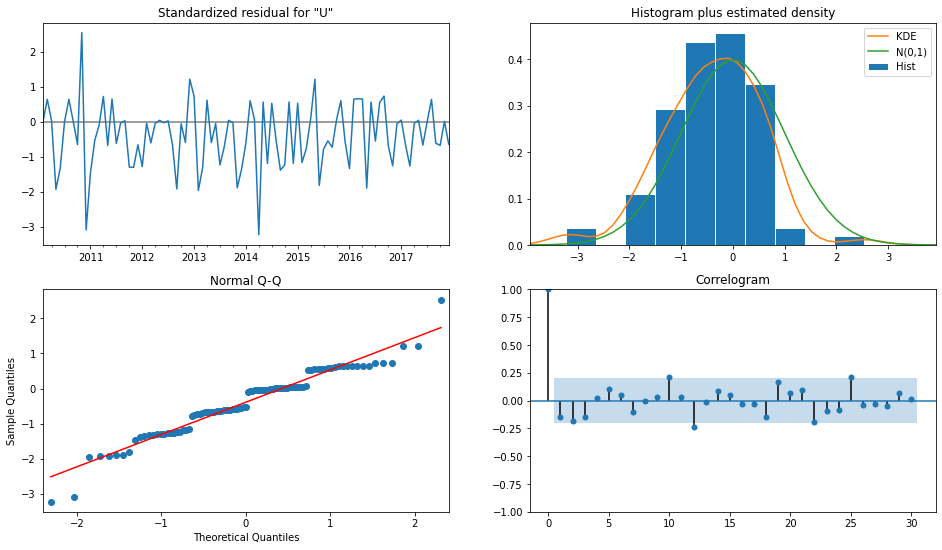

In [ ]:
fig = plt.figure(figsize=(16, 9))
fig = model_train.plot_diagnostics(fig=fig, lags=30)

In [ ]:
mtest=  ARIMA(u_test ,order=(1 ,1, 1))

model_test = mtest.filter(model_train.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Now we can look at the model performance on the test data.

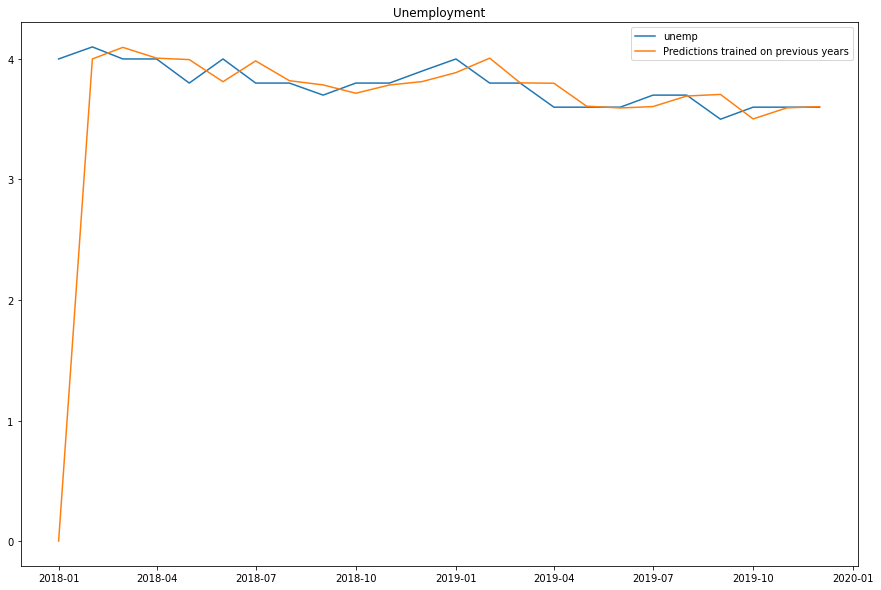

In [ ]:
plt.figure(figsize = (15,10))


plt.plot(u_test, label = "unemp")
plt.plot(model_test.predict(), label ="Predictions trained on previous years")



plt.title("Unemployment")


plt.legend()

plt.show()

### Forecast cones

In addition showing the expected future values, we can also get Confidence Intervals.

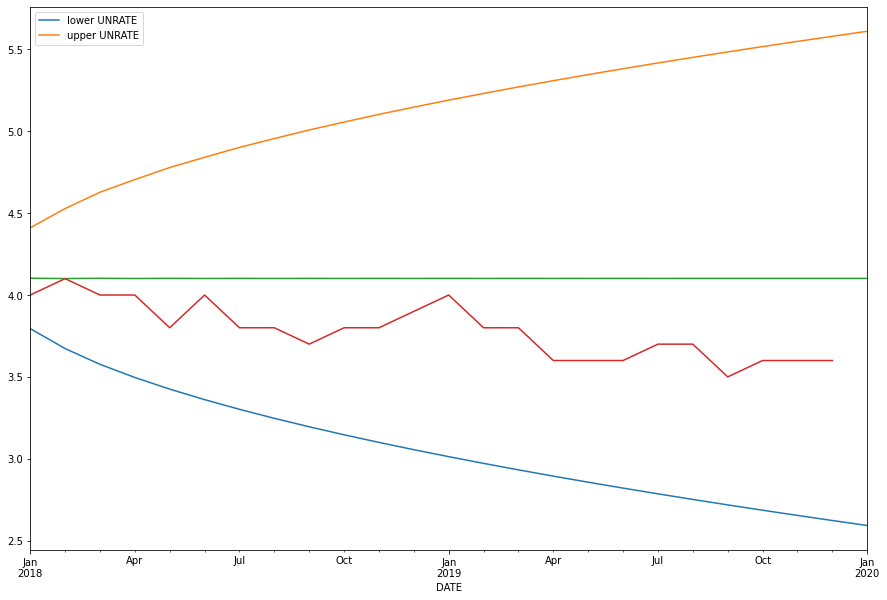

In [ ]:


model_train.get_forecast(25).conf_int().plot(figsize = (15,10))


model_train.get_forecast(25).predicted_mean.plot()

u_test.plot()




plt.show()







## Selecting model by out of sample performance.

We saw in our fake data examples that sometimes the auto_arima will not pick the "true" model. Another approach is to split data to test and train and pick the model that performs best out of sample.  

While sometimes, a grid-search is employed, we will do somewhat of a hybrid approach here.  We will first use auto_arima to show us the best 2-3 models, and compare just those.


Let's create a data set to illustrate.

In [ ]:
np.random.seed(3111)
arparms = [1, -.3, -.2]  
maparms = [1, .7]
sigma = .2
x = arma_generate_sample(arparms, maparms, nsample =  400, scale = sigma)


x_train = x[0:300]
x_test = x[300:]

auto_arima(x_train, trace= True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-100.251, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=175.517, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-66.793, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-41.238, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=173.521, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-102.108, Time=0.40 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-73.000, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-91.682, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-100.293, Time=0.49 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-82.048, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-95.656, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-98.435, Time=0.91 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-104.104, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-74.999, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-

ARIMA(order=(1, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

We see that auto_arima select $p=1$ and $q=2$ while the true model is $p=2, q=1$

Note that the selected model had an AIC of -104.1 while the true model has an AIC of -97.7.

Ignoring that there are other models with in-between AIC scores, let's compare performance on the test set.







In [ ]:
mselected_fit=  ARIMA(x_train ,order=(1 ,0, 2)).fit()

malt_fit =   ARIMA(x_train ,order=(2 ,0, 1)).fit()


mselected_test=  ARIMA(x_test ,order=(1 ,0, 2))

malt_test=  ARIMA(x_test ,order=(2 ,0, 1))


selected_test = mselected_test.filter(mselected_fit.params)


alt_test = malt_test.filter(malt_fit.params)



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


He now see how well each predicts compared to actual.

In [ ]:
rmse1 = np.sqrt((selected_test.predict() - x_test)@(selected_test.predict() - x_test)/len(x_test))

rmse2 = np.sqrt((alt_test.predict() - x_test)@(alt_test.predict() - x_test)/len(x_test))
rmse1, rmse2

(0.20161635459193802, 0.20039987589491132)

###  Excercise

Pick two data series from yahoo finance, fred, or anything else you think is interesting. Attempt to model it as an ARIMA process.  If the series is explosive (exponential), log it first.

Split into training test to see how well it worked and make appropriate plots.